In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 38.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from IPython.display import display, HTML
from itertools import product
import os
import pickle

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


In [5]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 305MB/s]


In [6]:
project_name = "/content/drive/MyDrive/FoD/results"
results = model.train(
            data='/content/drive/MyDrive/FoD/FoD_Dataset/data.yaml',
            epochs=50,
            imgsz=640,
            batch= 32,
            device='0',
            project=project_name+"/50_epochs__32_batch__0.0005_weight_decay",
            weight_decay=0.0005
        )

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/FoD/FoD_Dataset/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/MyDrive/FoD/results/50_epochs__32_batch__0.0005_weight_decay, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

100%|██████████| 755k/755k [00:00<00:00, 121MB/s]


Overriding model.yaml nc=80 with nc=31

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 121MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/FoD/FoD_Dataset/valid/labels.cache... 1981 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1981/1981 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/FoD/FoD_Dataset/test/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/FoD/results/50_epochs__32_batch__0.0005_weight_decay/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000286, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/FoD/results/50_epochs__32_batch__0.0005_weight_decay/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.57G      1.167        4.8      1.204         52        640: 100%|██████████| 62/62 [01:33<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [05:57<00:00, 22.32s/it]


                   all        990       1011     0.0371      0.548      0.131      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.14G      1.126      3.629      1.189         50        640: 100%|██████████| 62/62 [00:47<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


                   all        990       1011      0.388      0.355      0.345      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.14G      1.087      2.986      1.171         45        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


                   all        990       1011      0.669      0.484      0.553      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.15G      1.083      2.625      1.175         40        640: 100%|██████████| 62/62 [00:47<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]


                   all        990       1011      0.628      0.555      0.618      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.15G      1.015      2.258      1.127         50        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]

                   all        990       1011      0.701      0.649      0.718       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.14G      1.003       2.11      1.114         45        640: 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]


                   all        990       1011      0.741      0.686      0.739      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.14G     0.9684      1.899      1.101         36        640: 100%|██████████| 62/62 [00:48<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]


                   all        990       1011      0.758      0.758      0.796      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.14G     0.9979      1.791      1.111         44        640: 100%|██████████| 62/62 [00:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]

                   all        990       1011      0.861      0.761      0.865      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.14G     0.9161      1.589      1.066         43        640: 100%|██████████| 62/62 [00:46<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]

                   all        990       1011      0.828      0.829      0.873      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.14G     0.9252      1.518      1.077         50        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]

                   all        990       1011      0.773      0.826      0.873       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.14G     0.9092       1.41      1.064         46        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]

                   all        990       1011      0.792      0.876      0.909      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.16G     0.8846      1.358      1.062         50        640: 100%|██████████| 62/62 [00:47<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.33it/s]

                   all        990       1011      0.832      0.853      0.911      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.14G     0.8831       1.31      1.053         40        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        990       1011      0.891      0.888      0.928      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.14G     0.8564      1.215      1.045         49        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]

                   all        990       1011      0.893      0.895       0.94      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.16G     0.8432      1.153      1.038         54        640: 100%|██████████| 62/62 [00:46<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.38it/s]

                   all        990       1011       0.93       0.88       0.94      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.14G     0.8361      1.132      1.033         62        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]


                   all        990       1011       0.93      0.895      0.939      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.14G     0.8164      1.042      1.016         49        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]

                   all        990       1011      0.946      0.903      0.949      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.14G     0.8191      1.058      1.023         55        640: 100%|██████████| 62/62 [00:48<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]


                   all        990       1011      0.911      0.921      0.947      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.14G     0.8052      1.007      1.011         53        640: 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        990       1011      0.923       0.93      0.946      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.14G      0.799      1.001      1.016         50        640: 100%|██████████| 62/62 [00:47<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]


                   all        990       1011      0.904      0.931      0.948      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.14G     0.8005     0.9657      1.017         43        640: 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        990       1011      0.925        0.9      0.948      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.14G     0.7906     0.9459      1.014         51        640: 100%|██████████| 62/62 [00:48<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]


                   all        990       1011      0.926      0.936      0.948      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.14G     0.7831     0.8943      1.013         41        640: 100%|██████████| 62/62 [00:47<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        990       1011      0.947      0.917      0.952      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.14G     0.7597     0.8708      0.998         44        640: 100%|██████████| 62/62 [00:48<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]


                   all        990       1011      0.913      0.927      0.953      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.16G      0.754     0.8459       0.99         50        640: 100%|██████████| 62/62 [00:43<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]

                   all        990       1011      0.952      0.928      0.957      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.14G     0.7458     0.8339      1.001         46        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.36it/s]

                   all        990       1011      0.922       0.94      0.956      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.14G     0.7503     0.8259      0.992         45        640: 100%|██████████| 62/62 [00:46<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.07it/s]

                   all        990       1011      0.944       0.94      0.955      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.14G     0.7353     0.7891     0.9864         52        640: 100%|██████████| 62/62 [00:54<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]

                   all        990       1011      0.946      0.929      0.956      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.16G     0.7302     0.7771     0.9841         50        640: 100%|██████████| 62/62 [00:44<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.10it/s]

                   all        990       1011      0.951      0.931      0.958      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.14G     0.7155     0.7589     0.9772         46        640: 100%|██████████| 62/62 [00:49<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]


                   all        990       1011      0.946      0.937      0.957      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.14G     0.7091      0.753     0.9825         47        640: 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]

                   all        990       1011      0.944      0.942      0.957      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.14G     0.7117     0.7387     0.9845         47        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.30it/s]

                   all        990       1011      0.954      0.942       0.96      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.14G     0.6984     0.7145     0.9765         52        640: 100%|██████████| 62/62 [00:46<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        990       1011       0.96      0.941      0.961      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.14G     0.6943     0.7166     0.9649         53        640: 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]

                   all        990       1011      0.962      0.947      0.961      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.14G     0.6811     0.6943     0.9639         53        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]

                   all        990       1011      0.953      0.947      0.959      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.14G     0.6907     0.7078     0.9689         45        640: 100%|██████████| 62/62 [00:45<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]

                   all        990       1011      0.957      0.945       0.96      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.14G     0.6743     0.6614     0.9592         51        640: 100%|██████████| 62/62 [00:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]

                   all        990       1011      0.957      0.939      0.959      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.16G     0.6838     0.6711     0.9607         51        640: 100%|██████████| 62/62 [00:47<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]


                   all        990       1011      0.959      0.951      0.961      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.14G     0.6657     0.6715     0.9648         59        640: 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]

                   all        990       1011      0.957       0.95      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.14G      0.656     0.6428      0.959         43        640: 100%|██████████| 62/62 [00:46<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12<00:00,  1.32it/s]

                   all        990       1011      0.967      0.944      0.965      0.827


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.12G     0.5807     0.5802     0.8998         30        640: 100%|██████████| 62/62 [00:48<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]

                   all        990       1011       0.96      0.942      0.968      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.12G     0.5818     0.5551     0.9032         29        640: 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]

                   all        990       1011      0.959      0.952      0.973      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.12G     0.5613     0.5371     0.8927         30        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.40it/s]

                   all        990       1011      0.965       0.95      0.968      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.12G     0.5539     0.5224     0.8938         29        640: 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]

                   all        990       1011      0.964      0.947       0.97      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.12G     0.5526     0.5274     0.8973         29        640: 100%|██████████| 62/62 [00:42<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]

                   all        990       1011      0.967      0.941      0.973      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.12G     0.5387     0.5105      0.891         29        640: 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        990       1011      0.965      0.949      0.971      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.12G     0.5336     0.5047     0.8869         30        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.37it/s]

                   all        990       1011      0.964      0.948      0.971      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.12G     0.5269     0.5014     0.8857         29        640: 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]


                   all        990       1011      0.962       0.95      0.973      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.12G     0.5301     0.4948     0.8832         30        640: 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]

                   all        990       1011      0.973      0.945      0.972      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.12G      0.522     0.4994     0.8751         29        640: 100%|██████████| 62/62 [00:43<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]

                   all        990       1011      0.969      0.949      0.972       0.85



50 epochs completed in 0.968 hours.
Optimizer stripped from /content/drive/MyDrive/FoD/results/50_epochs__32_batch__0.0005_weight_decay/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/FoD/results/50_epochs__32_batch__0.0005_weight_decay/train/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/FoD/results/50_epochs__32_batch__0.0005_weight_decay/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,693 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.06s/it]


                   all        990       1011      0.969      0.948      0.972      0.851
AdjustableClamptrack_idkeyframe         17         17      0.983          1      0.995       0.87
AdjustableWrenchtrack_idkeyframe         21         21      0.999      0.905      0.912      0.839
Batterytrack_idkeyframe         30         30      0.907          1      0.995      0.855
BoltNutSettrack_idkeyframe         13         13      0.985          1      0.995      0.608
BoltWashertrack_idkeyframe         39         39      0.997          1      0.995      0.827
  Bolttrack_idkeyframe        100        100          1      0.994      0.995      0.803
ClampParttrack_idkeyframe         30         30      0.927          1      0.991      0.924
Cuttertrack_idkeyframe         46         46      0.991          1      0.995      0.961
FuelCaptrack_idkeyframe         18         18      0.982          1      0.995      0.865
Hammertrack_idkeyframe         13         13      0.974          1      0.995 

In [7]:
for i in range(31):
    print(f"For class {i}: {results.class_result(i)}")


For class 0: (0.9829258968938644, 1.0, 0.995, 0.8699301500918771)
For class 1: (0.9990837346824402, 0.9047619047619048, 0.9117500000000002, 0.8393929298245615)
For class 2: (0.9065520263777345, 1.0, 0.995, 0.8553027816581178)
For class 3: (0.9846271997203119, 1.0, 0.995, 0.6079273469120486)
For class 4: (0.9968917206375401, 1.0, 0.995, 0.8265747483556118)
For class 5: (1.0, 0.9938500159760002, 0.995, 0.8026721930935361)
For class 6: (0.9267168294946073, 1.0, 0.99125, 0.9241401908263306)
For class 7: (0.9911485475353302, 1.0, 0.995, 0.9607473883653341)
For class 8: (0.9819984699622527, 1.0, 0.995, 0.8646806311858075)
For class 9: (0.9741721715683714, 1.0, 0.995, 0.9447058082077051)
For class 10: (0.9745177688816175, 1.0, 0.995, 0.9209363197994989)
For class 11: (0.9957232439465508, 1.0, 0.995, 0.8948050407220391)
For class 12: (0.901359311692645, 0.8707359740693074, 0.9692731829573936, 0.9194133884711778)
For class 13: (0.9863689030160765, 1.0, 0.995, 0.8895312056929358)
For class 14: (

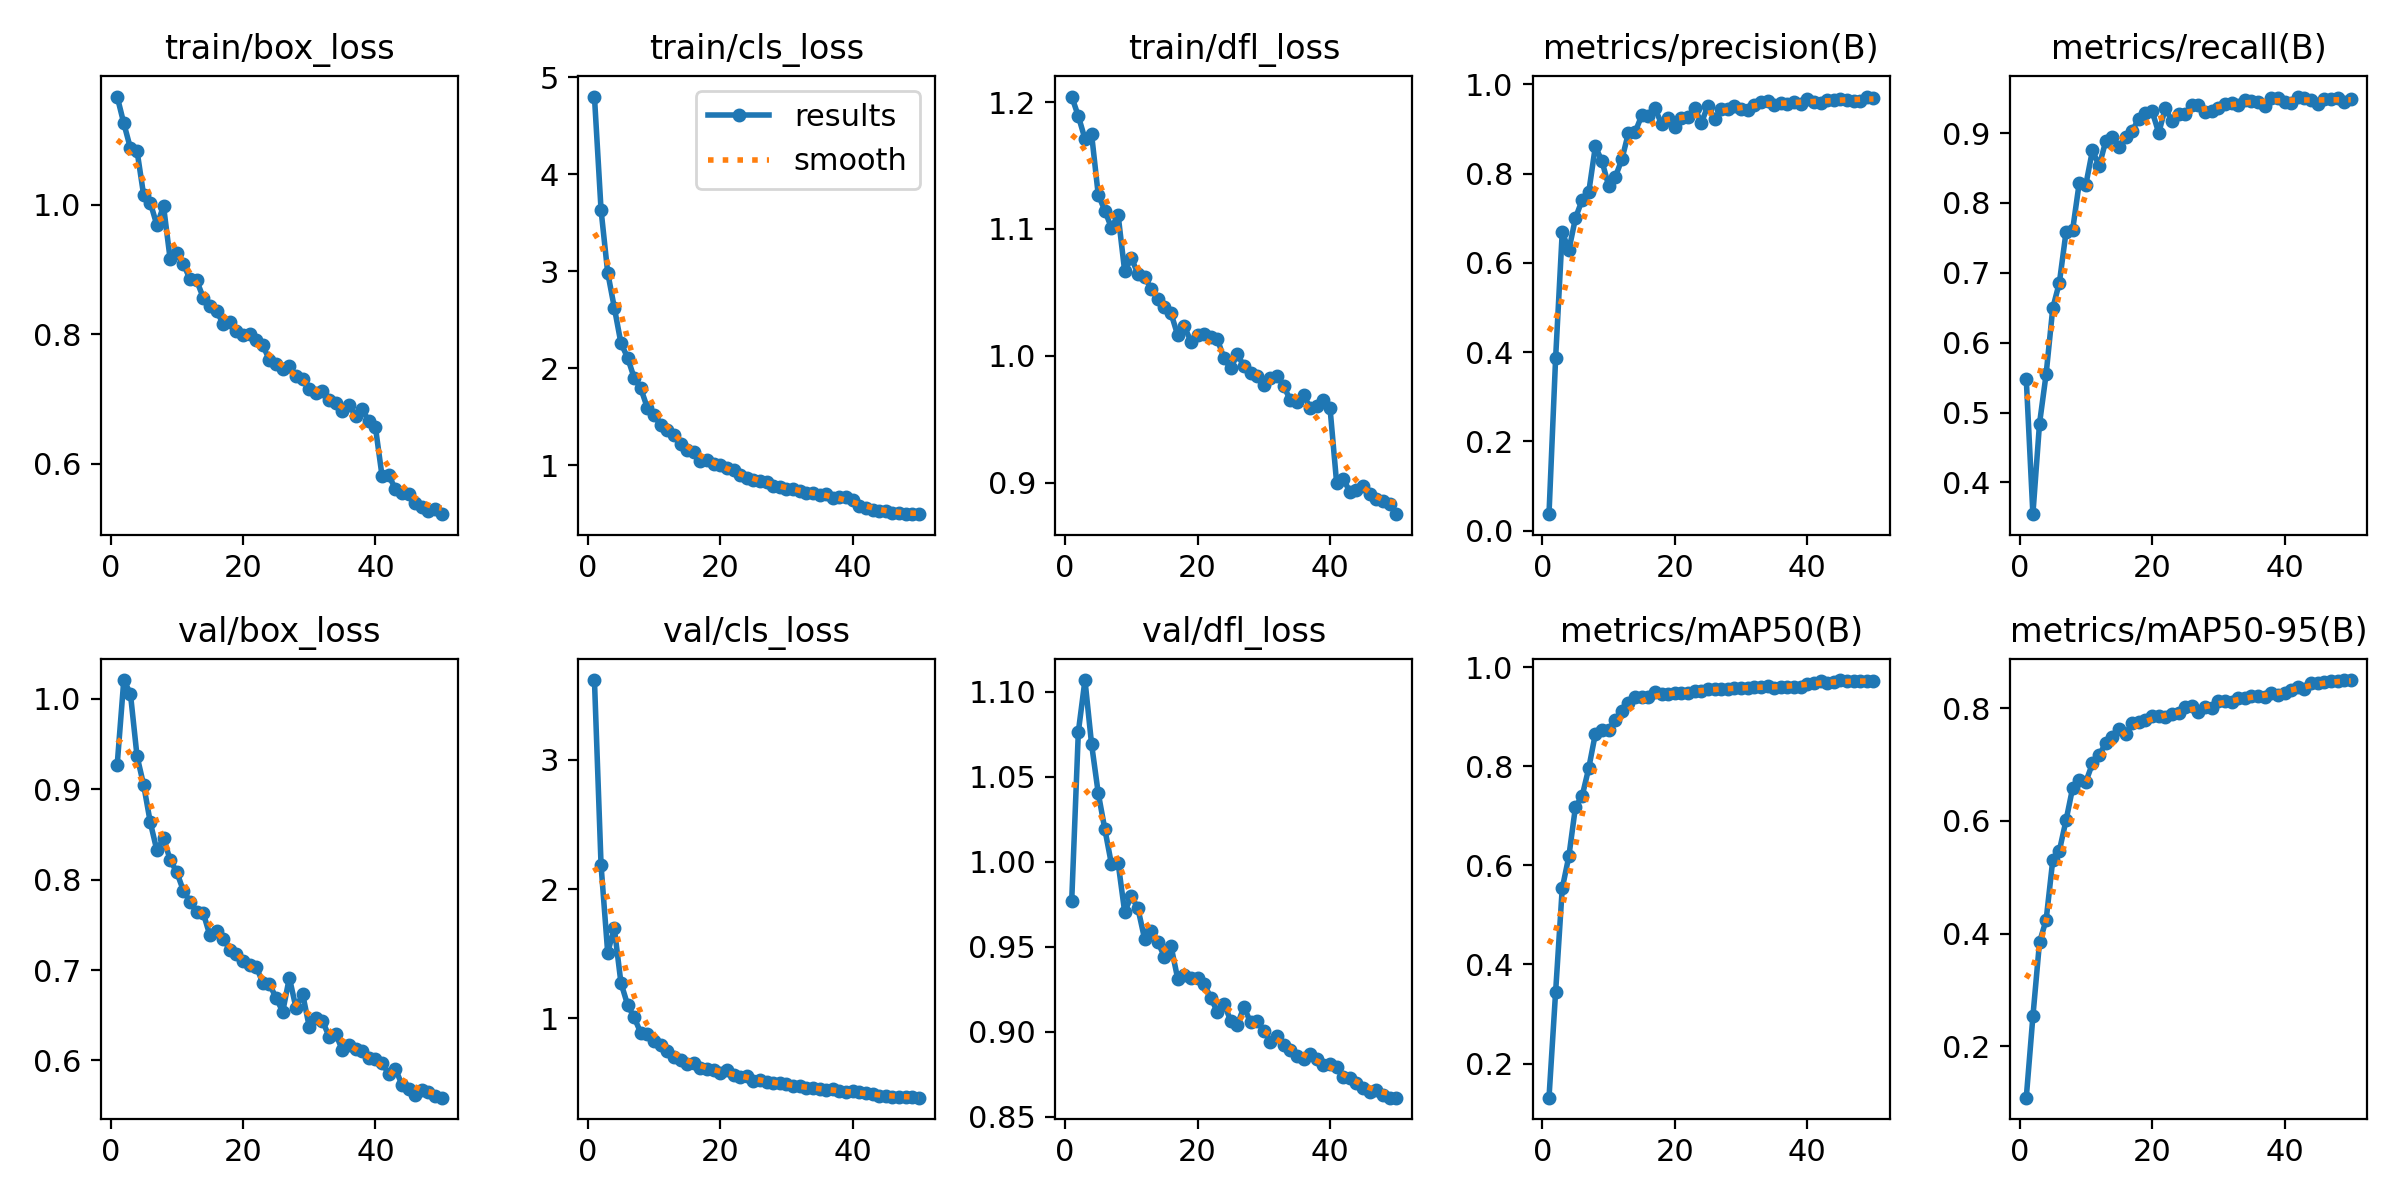

In [8]:
from PIL import Image
img = Image.open("/content/drive/MyDrive/FoD/results/train/results.png")
display(img)

In [9]:
val_results = model.val()


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,693 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/FoD/FoD_Dataset/test/labels.cache... 990 images, 0 backgrounds, 0 corrupt: 100%|██████████| 990/990 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]


                   all        990       1011      0.969      0.948      0.972      0.849
AdjustableClamptrack_idkeyframe         17         17      0.983          1      0.995       0.87
AdjustableWrenchtrack_idkeyframe         21         21      0.999      0.905      0.912      0.839
Batterytrack_idkeyframe         30         30      0.908          1      0.995      0.859
BoltNutSettrack_idkeyframe         13         13      0.984          1      0.995      0.604
BoltWashertrack_idkeyframe         39         39      0.997          1      0.995      0.827
  Bolttrack_idkeyframe        100        100          1      0.994      0.995      0.793
ClampParttrack_idkeyframe         30         30      0.927          1      0.991      0.921
Cuttertrack_idkeyframe         46         46      0.991          1      0.995      0.962
FuelCaptrack_idkeyframe         18         18      0.982          1      0.995      0.862
Hammertrack_idkeyframe         13         13      0.974          1      0.995 


image 1/1 /content/drive/MyDrive/FoD/FoD_Dataset/train/images/030739_jpg.rf.4a236273747db06a5ade309a92e0d652.jpg: 640x640 1 Washertrack_idkeyframe, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


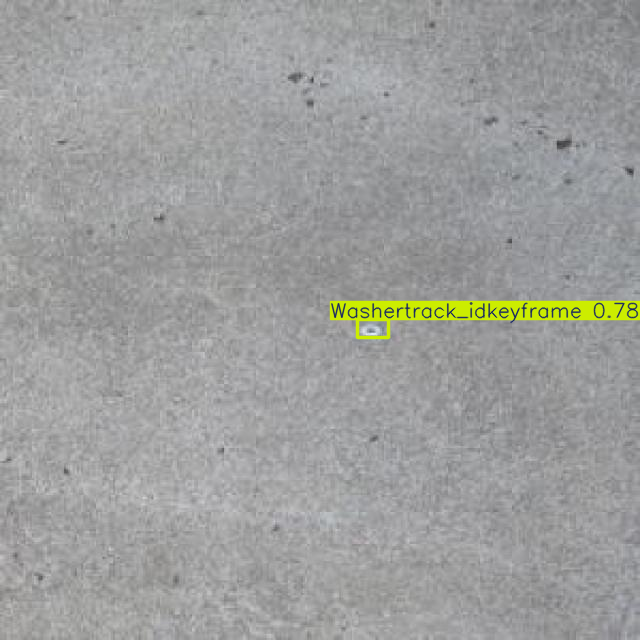

In [14]:
preds = model.predict("/content/drive/MyDrive/FoD/FoD_Dataset/train/images/030739_jpg.rf.4a236273747db06a5ade309a92e0d652.jpg")
preds[0].show()
# 030669_jpg.rf.358966a41b17582afbb834722c47b687.jpg
# 030739_jpg.rf.4a236273747db06a5ade309a92e0d652.jpg